In [1]:
import torch

In [3]:
torch.cuda.is_available()

False

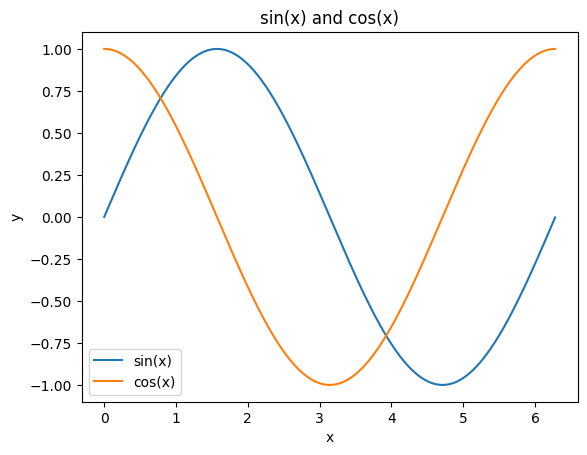

In [4]:
# draw a graph of sin(x) and cos(x)
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0, 2*np.pi, 0.01)
y = np.sin(x)
z = np.cos(x)

plt.plot(x, y, label='sin(x)')
plt.plot(x, z, label='cos(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('sin(x) and cos(x)')
plt.legend()
plt.show()


In [7]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [38]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

In [6]:
#  No module named 'torchvision'
!pip install torchvision



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 51.9 MB/s eta 0:00:00:00:0100:01


In [8]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

100.0%


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100.0%


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100.0%


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100.0%


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



Text(0.5, 1.0, 'label: Sneaker')

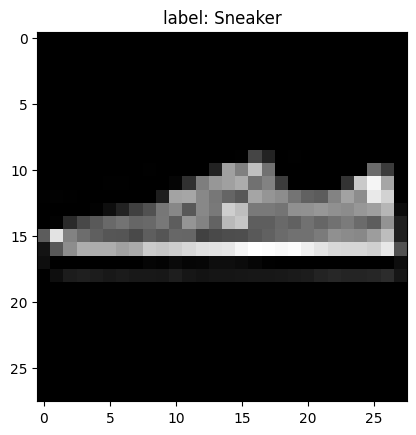

In [43]:
training_data.data[2]

idx = 14
# plot training_data.data[0]
plt.imshow(training_data.data[idx], cmap='gray')
# legent of training_data.data[0]
plt.title('label: {}'.format(classes[training_data.targets[idx]]))

In [9]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


In [95]:
test_dataloader.dataset.data.shape

torch.Size([10000, 28, 28])

Text(0.5, 1.0, 'relu function')

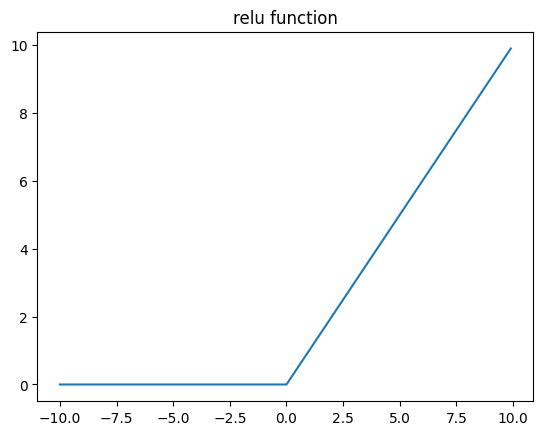

In [96]:
# plot relu function
x = torch.arange(-10, 10, 0.1)
y = torch.relu(x)
plt.plot(x.numpy(), y.numpy())
plt.title('relu function')


In [10]:
# Get cpu, gpu or mps device for training.
device =  "cpu" 

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [11]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [32]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [13]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [34]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 1.042075  [   64/60000]
loss: 1.067125  [ 6464/60000]
loss: 0.863507  [12864/60000]
loss: 1.029036  [19264/60000]
loss: 0.901299  [25664/60000]
loss: 0.918851  [32064/60000]
loss: 0.974966  [38464/60000]
loss: 0.921719  [44864/60000]
loss: 0.951039  [51264/60000]
loss: 0.905156  [57664/60000]
Test Error: 
 Accuracy: 67.3%, Avg loss: 0.911056 

Epoch 2
-------------------------------
loss: 0.953015  [   64/60000]
loss: 0.997529  [ 6464/60000]
loss: 0.779946  [12864/60000]
loss: 0.963001  [19264/60000]


KeyboardInterrupt: 

In [15]:
x[1]

0.01

In [61]:
# prediciton of     test_data.data[0]
test_data.data[0][0],test_data.data[0][1]
# pred = model(test_data.data[0].reshape(1, 28*28).to(device))


(tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0], dtype=torch.uint8),
 tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0], dtype=torch.uint8))

In [92]:
training_data.data[1], test_data.data[0]

(tensor([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,  54,
           48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236, 255,
          255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196, 200,
          215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199, 201,
          196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,   0,   0],
         [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250, 245,
          249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,   0,   0],
         [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,  73,
           48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,   0,   0],
         [  0,   0,   0,   0, 200,

In [44]:
x, y = test_data[0][0], test_data[0][1]

TypeError: Invalid shape (1, 28, 28) for image data

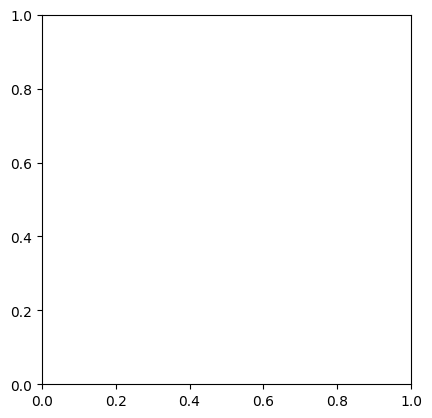

In [85]:
# predict the label of test_data[0]
pred = model(test_data[0][0].reshape(1, 28*28).to(device))
# get the class of pred
# plot test_data[0, 0]
plt.imshow(test_data[0][0], cmap='gray')
# legent of test_data[0, 0]
plt.title('label: {}'.format(classes[torch.max(pred, dim=1).indices]))




TypeError: Invalid shape (1, 28, 28) for image data

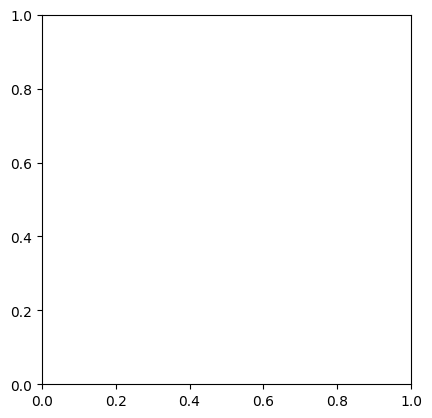

In [84]:
# plot test_data[0][0]
plt.imshow(test_data[0][0], cmap='gray')

In [66]:
pred, classes[pred.argmax(1)]

(tensor([[-3.0510, -4.4882, -1.6395, -2.1828, -1.2682,  3.8639, -1.3506,  3.8062,
           2.2271,  4.2842]], grad_fn=<AddmmBackward0>),
 'Ankle boot')

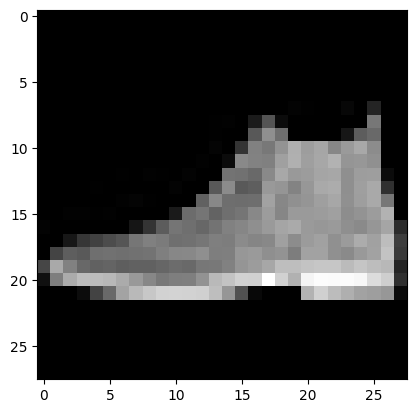

In [86]:
#plot the test_data.data[0]
plt.imshow(test_data.data[0], cmap='gray')

In [2]:
import torch
import torch.nn as nn
import math
import matplotlib.pyplot as plt

In [2]:
torch.cuda.is_available()   

False

In [3]:
x = torch.linspace(0, 2*math.pi, 100)
y = torch.sin(x)

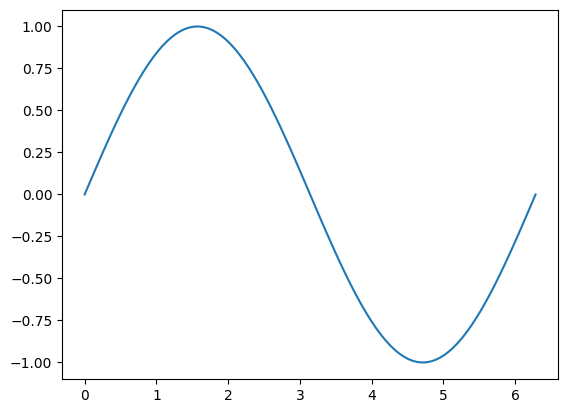

In [4]:
# plot x and y
plt.plot(x.numpy(), y.numpy())



0 0.5212549567222595
50000 0.010078467428684235
100000 0.001245026127435267
150000 0.0007022919016890228
200000 0.0005584834143519402
250000 0.000504475727211684
300000 0.0004664598382078111
350000 0.00043416154221631587
400000 0.0004112203314434737
450000 0.0003920283052138984


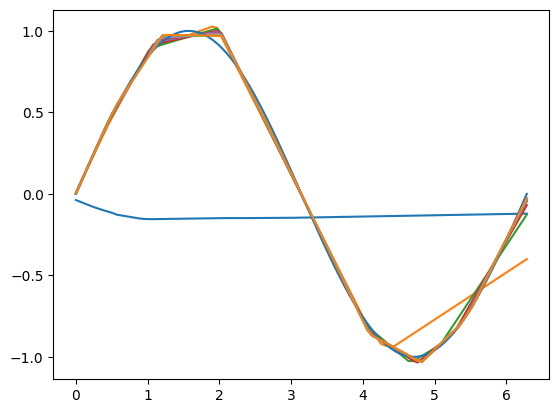

In [9]:
model = nn.Sequential(
    nn.Linear(1, 10),
    nn.ReLU(),
    nn.Linear(10, 10),
    nn.ReLU(),
    nn.Linear(10, 1)
)

loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

epochs = 500000
for t in range(epochs):
    y_pred = model(x.reshape(-1, 1))
    loss = loss_fn(y_pred, y.reshape(-1, 1))
    loss.backward()
    optimizer.step()
    if t % 50000 == 0:
        # print epoch and loss
        print(t, loss.item())
        plt.plot(x.numpy(), y_pred.detach().numpy())
    optimizer.zero_grad()

y_pred = model(x.reshape(-1, 1))
plt.plot(x.numpy(), y.numpy())
plt.plot(x.numpy(), y_pred.detach().numpy())








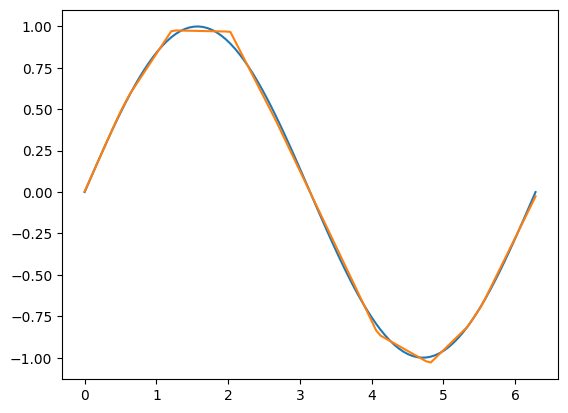

In [12]:
y_pred = model(x.reshape(-1, 1))
plt.plot(x.numpy(), y.numpy())
plt.plot(x.numpy(), y_pred.detach().numpy())

In [10]:
x.reshape(-1, 1)

tensor([[0.0000],
        [0.0635],
        [0.1269],
        [0.1904],
        [0.2539],
        [0.3173],
        [0.3808],
        [0.4443],
        [0.5077],
        [0.5712],
        [0.6347],
        [0.6981],
        [0.7616],
        [0.8251],
        [0.8885],
        [0.9520],
        [1.0155],
        [1.0789],
        [1.1424],
        [1.2059],
        [1.2693],
        [1.3328],
        [1.3963],
        [1.4597],
        [1.5232],
        [1.5867],
        [1.6501],
        [1.7136],
        [1.7771],
        [1.8405],
        [1.9040],
        [1.9675],
        [2.0309],
        [2.0944],
        [2.1579],
        [2.2213],
        [2.2848],
        [2.3483],
        [2.4117],
        [2.4752],
        [2.5387],
        [2.6021],
        [2.6656],
        [2.7291],
        [2.7925],
        [2.8560],
        [2.9195],
        [2.9829],
        [3.0464],
        [3.1099],
        [3.1733],
        [3.2368],
        [3.3003],
        [3.3637],
        [3.4272],
        [3

In [11]:
x

tensor([0.0000, 0.0635, 0.1269, 0.1904, 0.2539, 0.3173, 0.3808, 0.4443, 0.5077,
        0.5712, 0.6347, 0.6981, 0.7616, 0.8251, 0.8885, 0.9520, 1.0155, 1.0789,
        1.1424, 1.2059, 1.2693, 1.3328, 1.3963, 1.4597, 1.5232, 1.5867, 1.6501,
        1.7136, 1.7771, 1.8405, 1.9040, 1.9675, 2.0309, 2.0944, 2.1579, 2.2213,
        2.2848, 2.3483, 2.4117, 2.4752, 2.5387, 2.6021, 2.6656, 2.7291, 2.7925,
        2.8560, 2.9195, 2.9829, 3.0464, 3.1099, 3.1733, 3.2368, 3.3003, 3.3637,
        3.4272, 3.4907, 3.5541, 3.6176, 3.6811, 3.7445, 3.8080, 3.8715, 3.9349,
        3.9984, 4.0619, 4.1253, 4.1888, 4.2523, 4.3157, 4.3792, 4.4427, 4.5061,
        4.5696, 4.6331, 4.6965, 4.7600, 4.8235, 4.8869, 4.9504, 5.0139, 5.0773,
        5.1408, 5.2043, 5.2677, 5.3312, 5.3947, 5.4581, 5.5216, 5.5851, 5.6485,
        5.7120, 5.7755, 5.8389, 5.9024, 5.9659, 6.0293, 6.0928, 6.1563, 6.2197,
        6.2832])

In [13]:
y_pred = model(x.reshape(-1, 1))

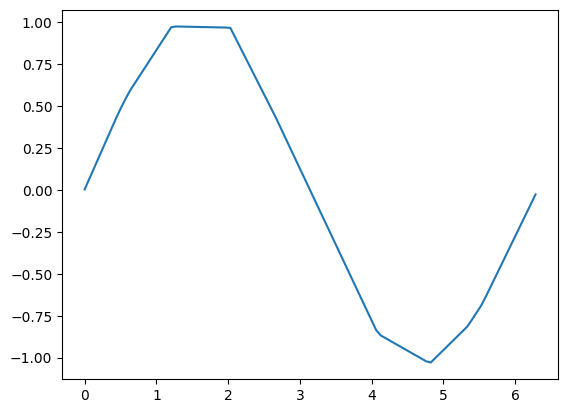

In [14]:
plt.plot(x.numpy(), y_pred.detach().numpy())